In [1]:
#Import libraries
import numpy as np
from array import array
import matplotlib.pyplot as plt

In [2]:
# ==========================
# FUNCTION: isolate(array, wn)
def isolate(array, wn):
    fwd = np.fft.rfft(array)
    fwd[0:wn] = 0.0
    fwd[wn+1:] = 0.0
    return np.fft.irfft(fwd)
# ==========================

# ==========================
# FUNCTION: transform(array, wn)
def transform(array, wn):
    fwd = np.fft.rfft(array)
    fwd[wn:] = 0.0
    return np.fft.irfft(fwd)
# ==========================

# ==========================
# FUNCTION: power(array)
def power(array):
    return np.abs(np.fft.rfft(array))**2
# ==========================

In [3]:
# ==========================
# PROGRAM INITIALIZATION
# Define constants for later use.
points = 100 #gridpts
dx = 10000 #m
t = 100000 #s
dt = 1100 
U = 10 #m/s
a= 100
b = 50 #inital grid
c = 3

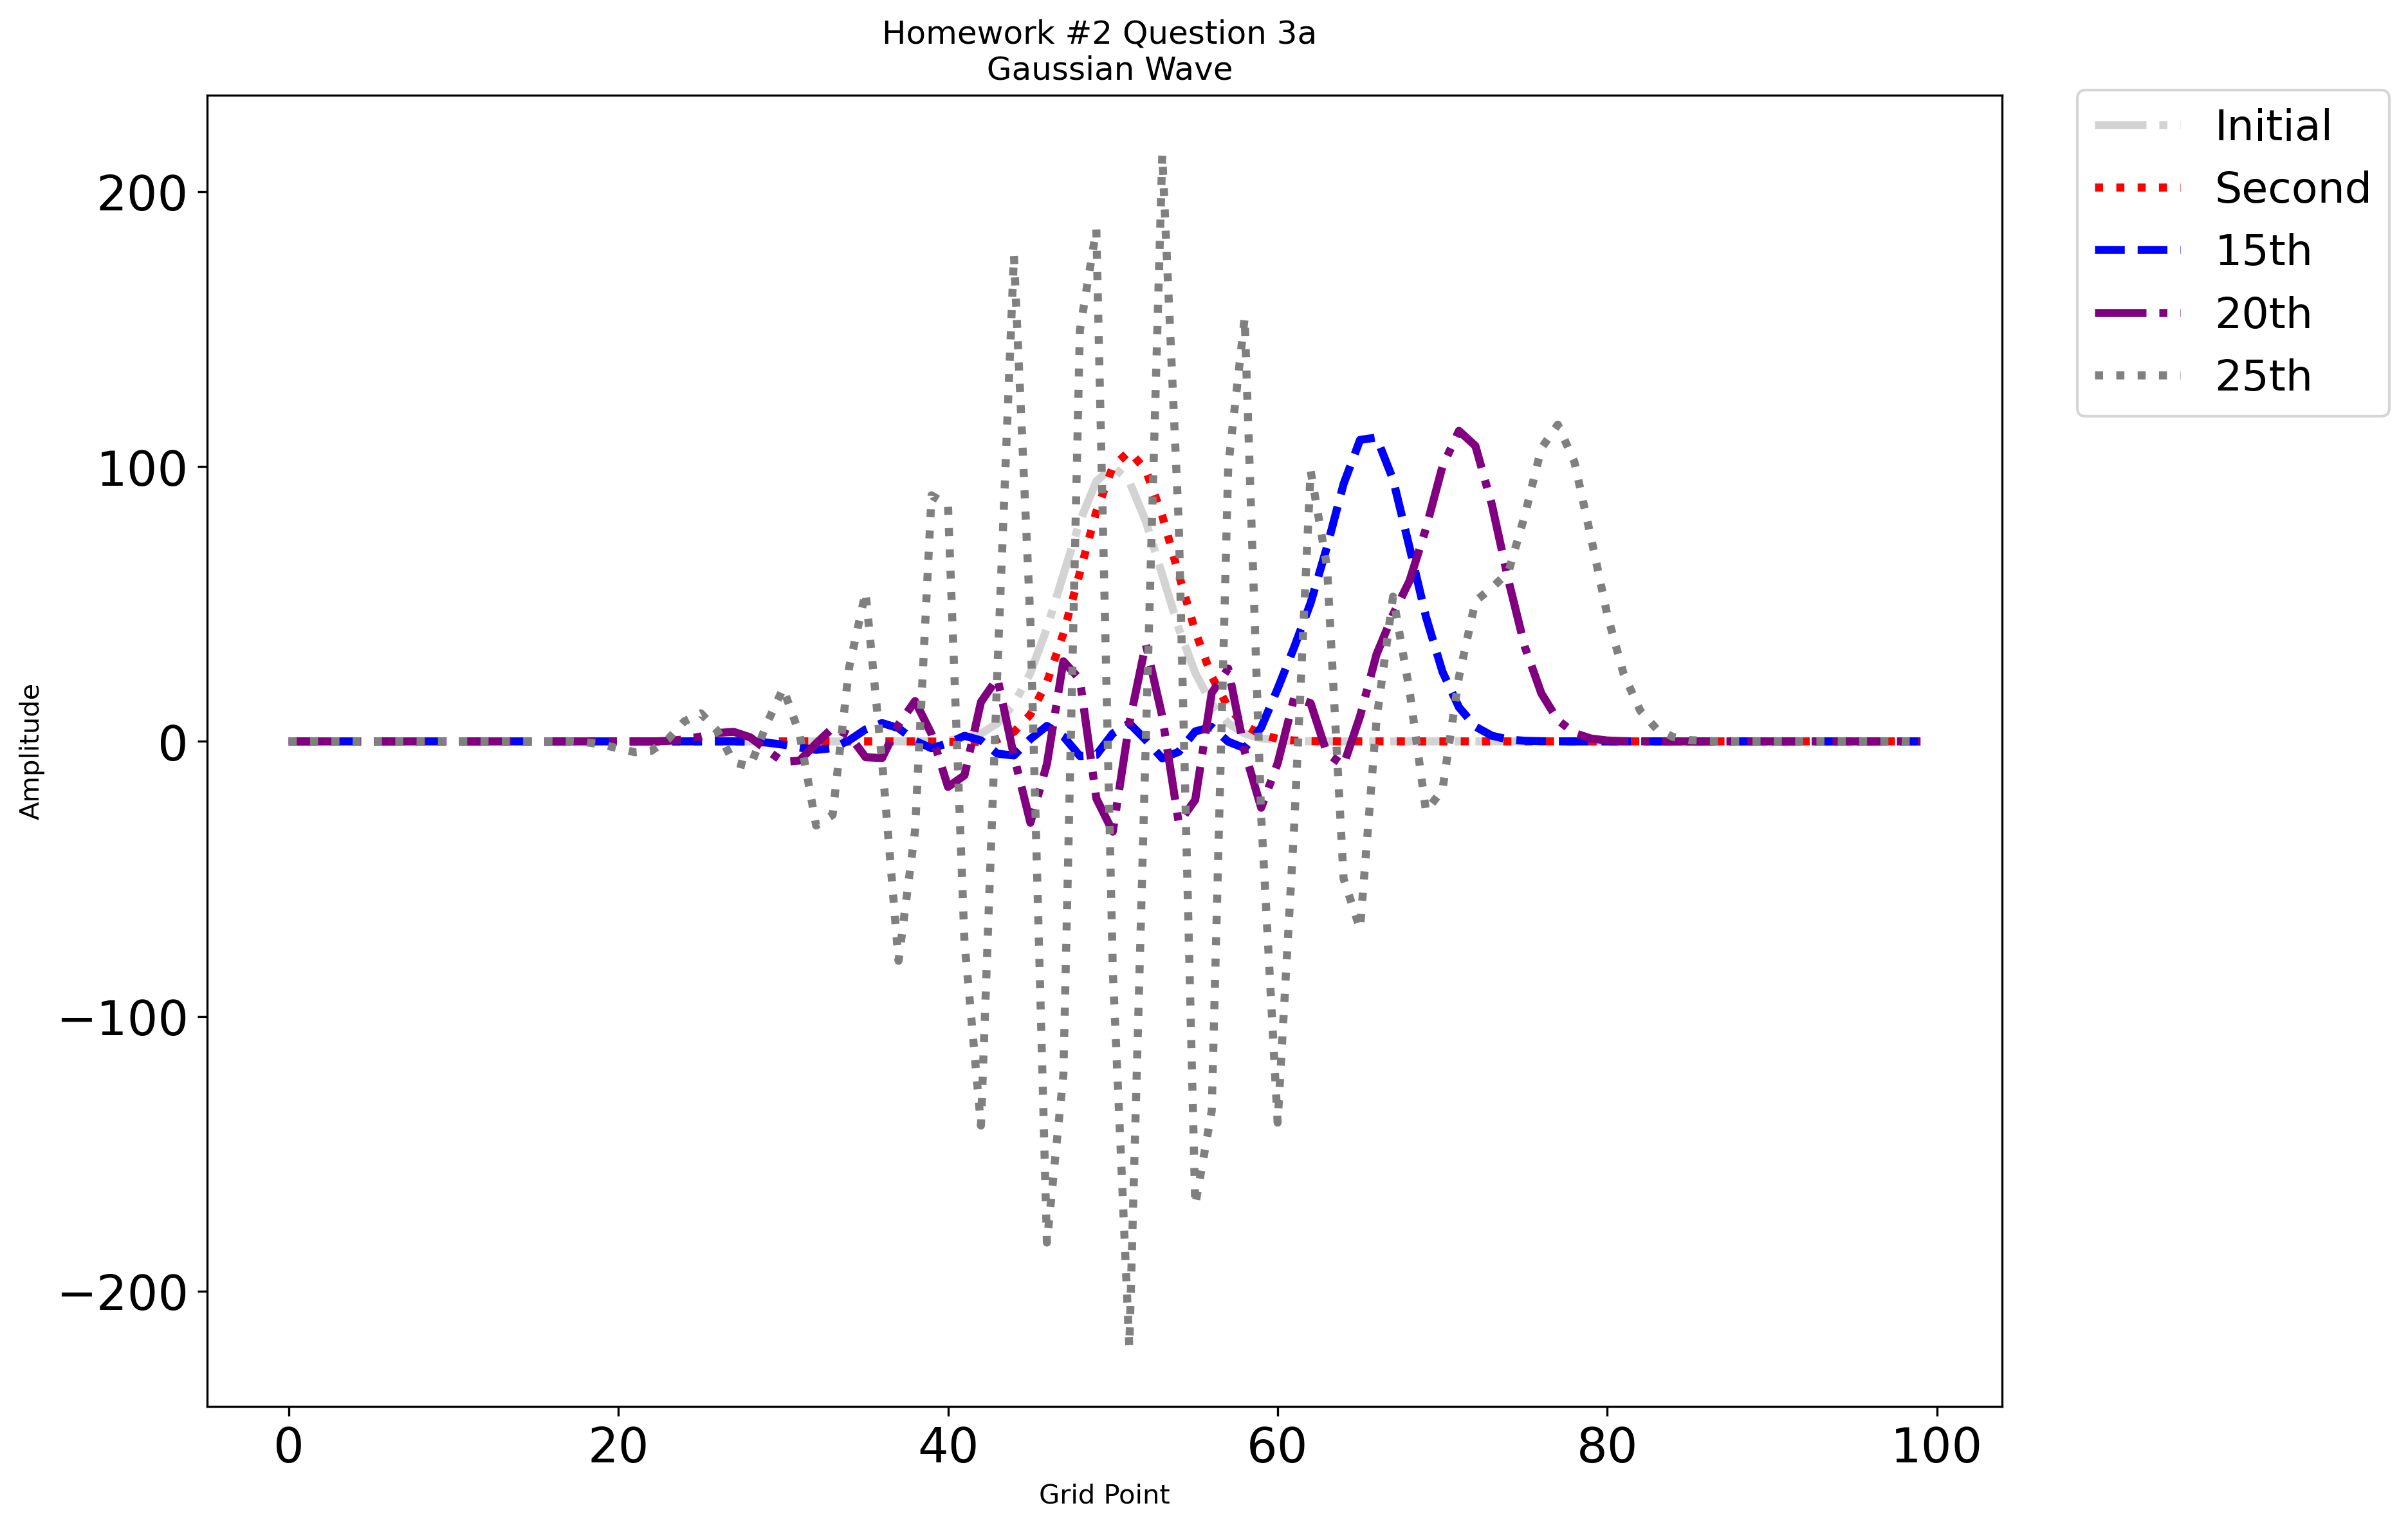

In [4]:
#set up empty 2-D array for finite diff eq and gridpts
h= np.zeros([91, 100])
x = np.arange(points)

#set up initial conditions for gaussian wave
h[0,:] = a * np.exp(-(x-b)**2/(2*c**2))

#given C = 1.1                     
#timesteps = t/dt = 90.91, ~90, gridpoints = j = 100 
for i in range (0, 2):
    for j in range (0, 100):
        #Correct for grid boundary starting at grid pt 50
        if j < 50:
            x1= j+50
        else:
            x1 = j-50
        #finite difference equation
        if x1==0:
            h[i+1,0] = h[i,0]-((dt*U)*((h[i,1]-h[i,99])/(2*dx)))     
        elif x1==99:
            h[i+1,x1] = h[i,x1]-((dt*U)*((h[i,0]-h[i,98])/(2*dx)))     
        else:
            h[i+1,x1] = h[i,x1]-((dt*U)*((h[i,x1+1]-h[i,x1-1])/(2*dx))) 
              
for i in range (2, 90):
    for j in range (0, 100):
        #Correct for grid boundary starting at grid pt 50
        if j < 50:
            x1= j+50
        else:
            x1 = j-50
        #finite difference equation
        if x1 ==0:
            h[i+1,x1] = h[i-1,x1]-((dt*U)*((h[i,x1+1]-h[i,99])/(dx))) 
        elif x1==99:
            h[i+1,x1] = h[i-1,x1]-((dt*U)*((h[i,0]-h[i,98])/(dx)))     
        else:
            h[i+1,x1] = h[i-1,x1]-((dt*U)*((h[i,x1+1]-h[i,x1-1])/(dx)))      

 
#Plot figure 
fig1 = plt.figure(figsize=(12,9), dpi=300)
ax = plt.axes()
plt.title("Homework #2 Question 3a \n Gaussian Wave")
plt.xlabel("Grid Point")
plt.ylabel("Amplitude") 
ax.plot(h[0,:], linestyle='dashdot', color='lightgray', linewidth=3, label='Initial')
ax.plot(h[1,:], linestyle='dotted', color='red', linewidth=3, label='Second')
ax.plot(h[14,:], linestyle='dashed', color='blue', linewidth=3, label='15th')
ax.plot(h[19,:], linestyle='dashdot', color='purple', linewidth=3, label='20th')
ax.plot(h[24,:], linestyle='dotted', color='grey', linewidth=3, label='25th')
ax.tick_params(axis='both', labelsize=18)
legend = plt.legend(fontsize=16, bbox_to_anchor=(1.03, 1.02), loc='upper left')
plt.show()

Question 3a) The first and second initial waves are similiar in amplitude, with the second wave being slightly displaced with the slight appearance of a trailing wave. Later runs (15th, 20th, and 25th) all have similiar ampltitudes of the leading wave, however the number and amplitude of trailing waves differ. With each increased time, the trailing waves grow in ampltitude and increase in number of trailing waves. 

Question 3b) For a courant number of 1.1, between wavelengths 3.14dx and 5.51dx the finite difference scheme is numerically unstable. This is found by solving the equation 1.1sin(kdx) <= 1 for wavelength.  

Question 3c) The solution in question three uses the same equation as problem 2 for the first two time steps. In problem 3, the ampltitude of the leading wave appears to stay consistent, whereas in problem 2 it continued to grow in ampltitude with each time step due to the model experiencing exponential growth. In problem 3, there are many more trailing waves at highly amplitutdes for later runs of the model. 

The differences between the two solutions is that solution 2 was numerically unstable for each run of the model as leading waves amplitude increase with each run and exponential growth was maximized near 4dx. For solution 3, the model appears to have exponential growth occuring near shorter wavelengths, but the rest of the model runs are not experiencing growth, as the amplitude of each wave is similiar. 

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app
/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in true_divide
  app.launch_new_instance()
/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in true_divide
/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in true_divide


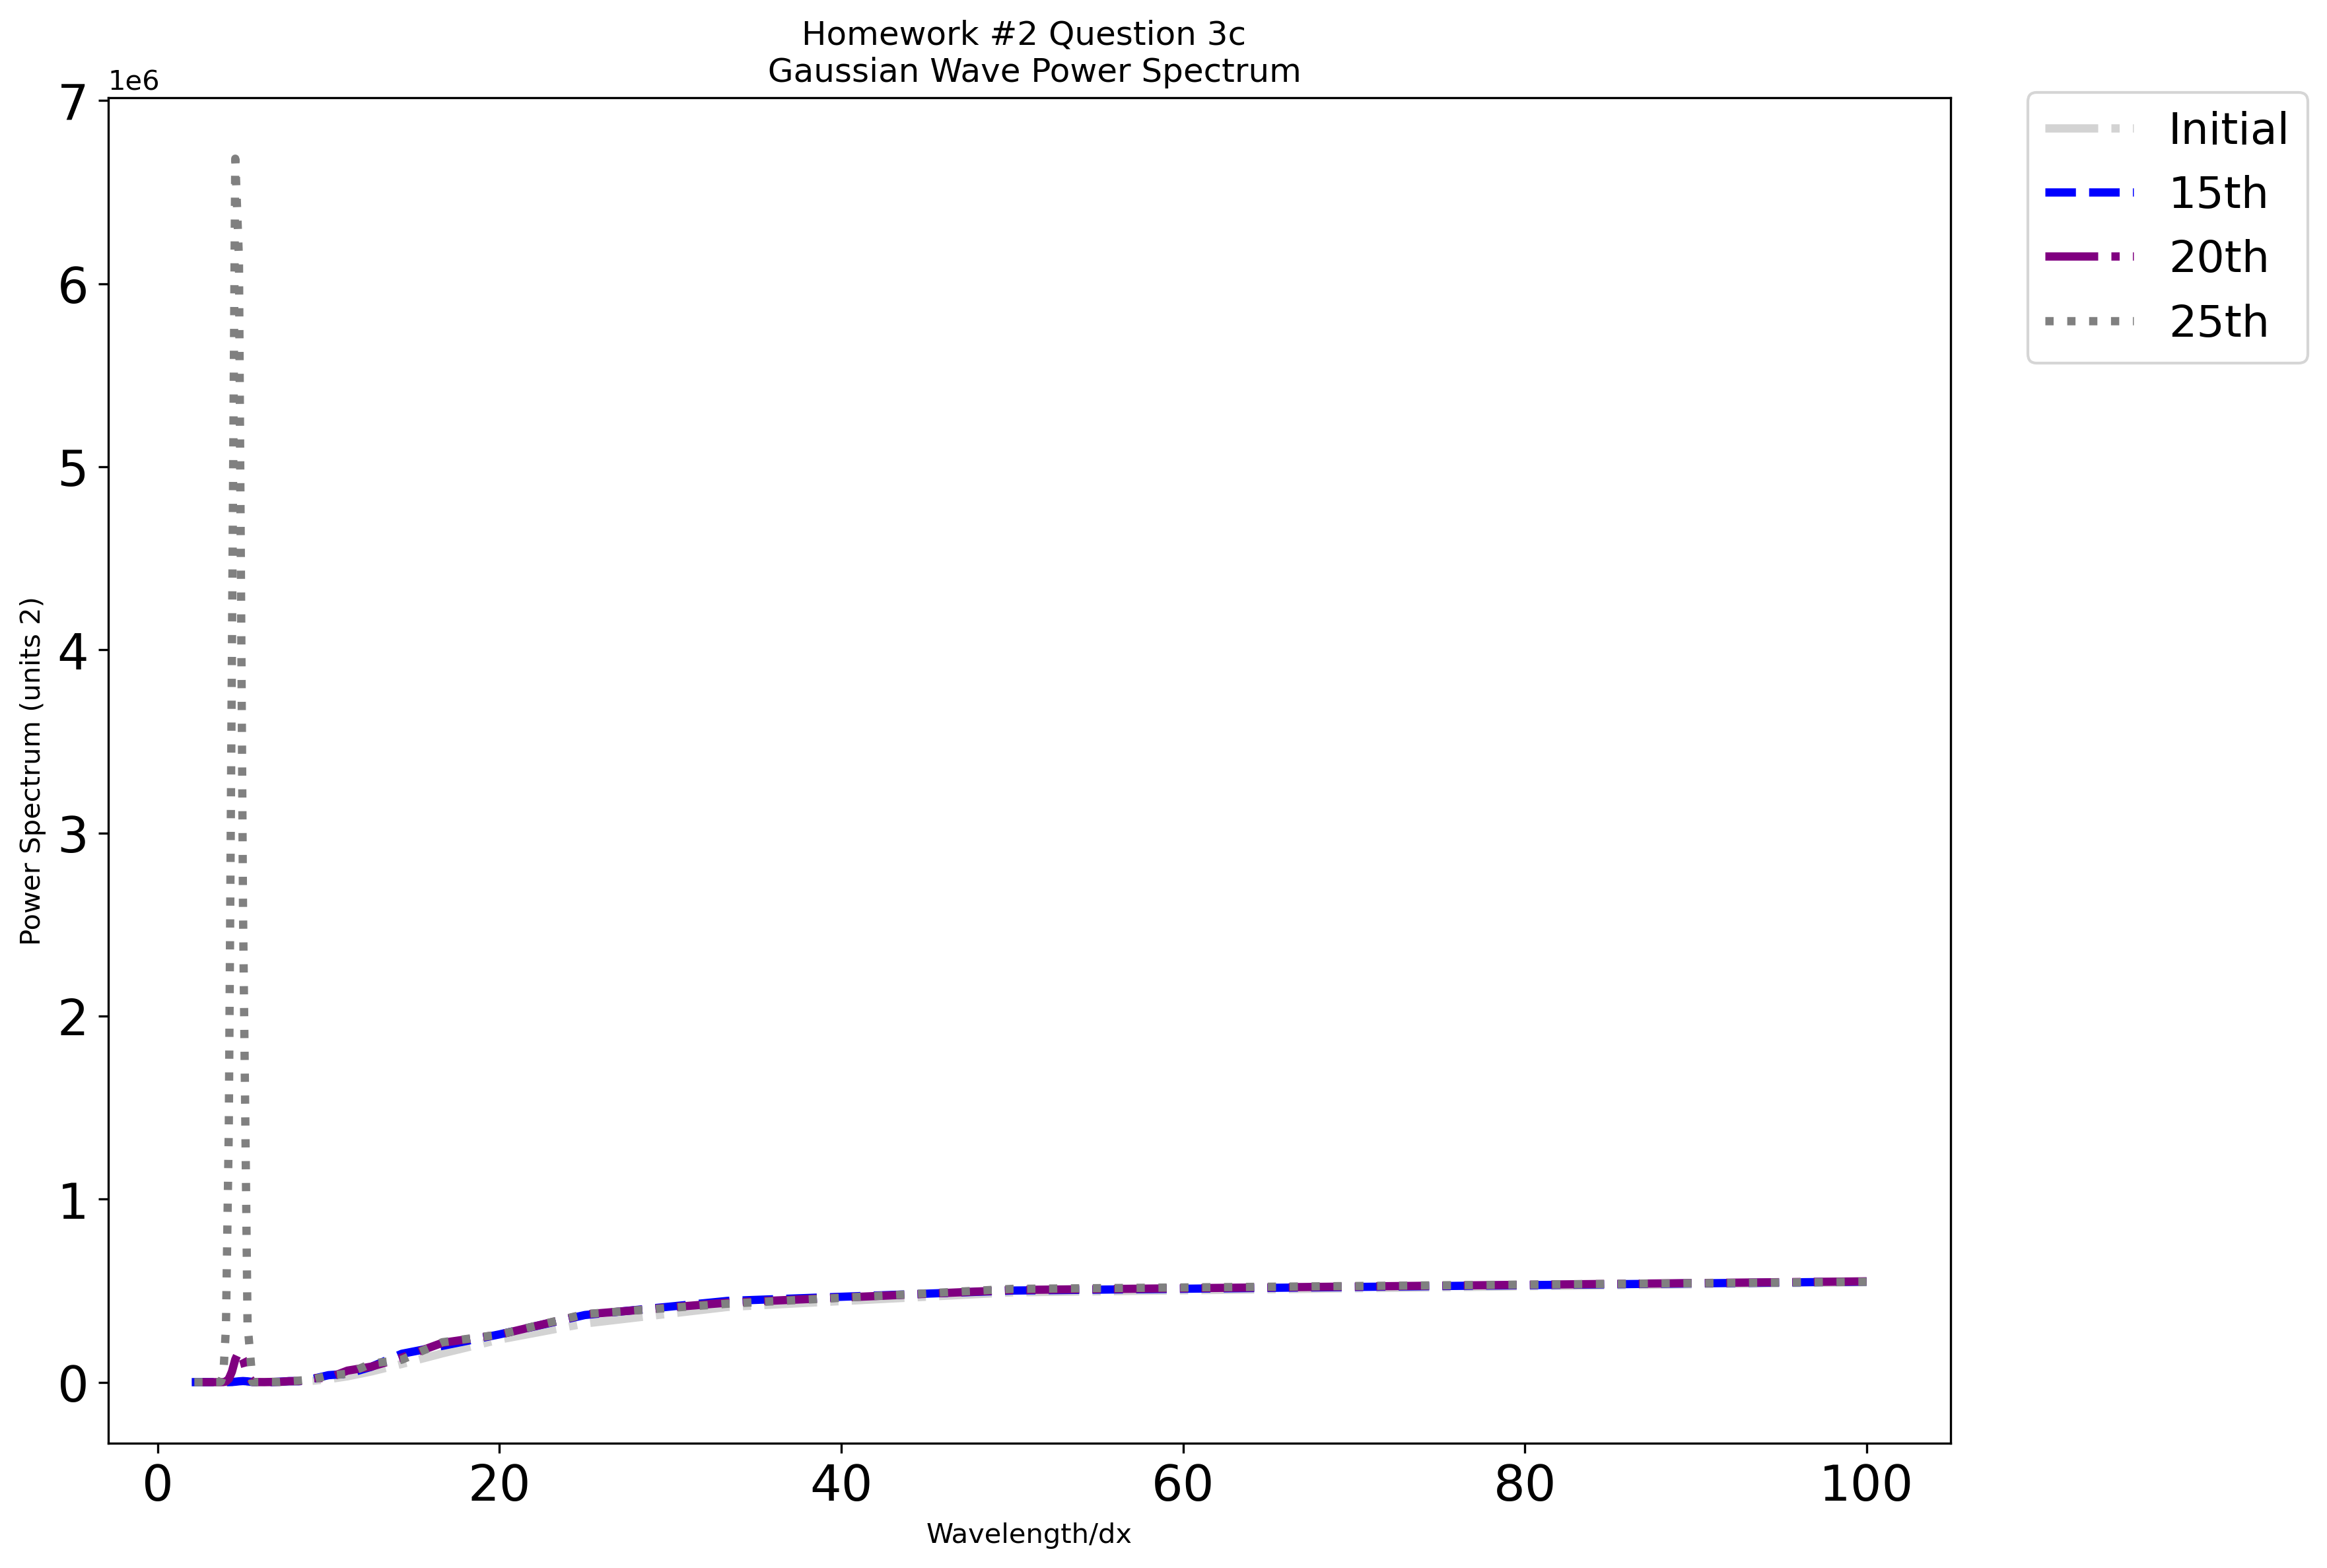

In [5]:
#call power spectrum function
ps0= power(h[0,:])
ps4= power(h[14,:])
ps8= power(h[19,:])
psl= power(h[24,:])
freqs = np.fft.rfftfreq(x.size, dx)


#Plot figure for power spectrum
fig1 = plt.figure(figsize=(12,9), dpi=300)
ax = plt.axes()
plt.title("Homework #2 Question 3c \n Gaussian Wave Power Spectrum")
plt.xlabel("Wavelength/dx")
plt.ylabel("Power Spectrum (units 2)")
ax.plot(1/freqs/dx, ps0, linestyle='dashdot', color='lightgray', linewidth=3, label='Initial')
ax.plot(1/freqs/dx, ps4, linestyle='dashed', color='blue', linewidth=3, label='15th')
ax.plot(1/freqs/dx, ps8, linestyle='dashdot', color='purple', linewidth=3, label='20th')
ax.plot(1/freqs/dx, psl, linestyle='dotted', color='grey', linewidth=3, label='25th')
ax.tick_params(axis='both', labelsize=18)
legend = plt.legend(fontsize=16, bbox_to_anchor=(1.03, 1.02), loc='upper left')
plt.show()

Question 3d) The power spectrum is relatively the same for each time, except for the 25th run which grows quickly around 5 to 10 wavelength/dx before joining the other members. Overall, this confirms question 3b as the model experiences exponential growth near the range of 3.14dx and 5.5dx, as the power spectrum increases rapidily for these wavelengths. Also, this confirms the model did not see exponential growth in the model outside of those wavelengths as expected by similiar amplitude leading waves and confirmed by the power spectrum being similiar for each later run after the 5.5dx wavelength. 